In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics
import json
import pathlib

In [ ]:
def categorize_age(age):
    if pd.isna(age):
        return None
    if 0 < age <= 20:
        return 0
    elif 21 <= age <= 40:
        return 1
    elif 41 <= age <= 60:
        return 2
    elif 61 <= age <= 80:
        return 3
    elif age >= 81:
        return 4
    else:
        return None

# CheXpert

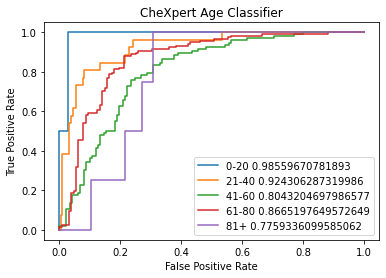

In [ ]:
base_jpg_path = r"D:\JSRT_Kaggle"
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\chexpert_age.pkl") # replace
test_df['age'] = test_df['age'].replace('?', np.nan)
test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce').astype('Int64')
test_df['Patient Age Category'] = test_df['age'].apply(categorize_age)
test_path = r'D:\JSRT_Kaggle'# Replace this with the root path of your test images

# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='Patient Age Category',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=16
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Age_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Age_Probability'] =sex_preds[0].numpy().tolist()
predict_df['Patient Age Category'] = predict_df['age'].apply(categorize_age)
predict_df = predict_df.dropna(subset=['Patient Age Category'])
predict_df.to_csv('chexpert_age_jsrt_test.csv', index=False)

predict_df = predict_df.dropna(subset=['Patient Age Category'])
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = 0)
plt.plot(fpr,tpr, label='0-20 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = 1)
plt.plot(fpr,tpr, label='21-40 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = 2)
plt.plot(fpr,tpr, label='41-60 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = 3)
plt.plot(fpr,tpr, label='61-80 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = 4)
plt.plot(fpr,tpr, label='81+ ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('CheXpert Age Classifier')
plt.legend(loc=4)
plt.show()

# MIMIC

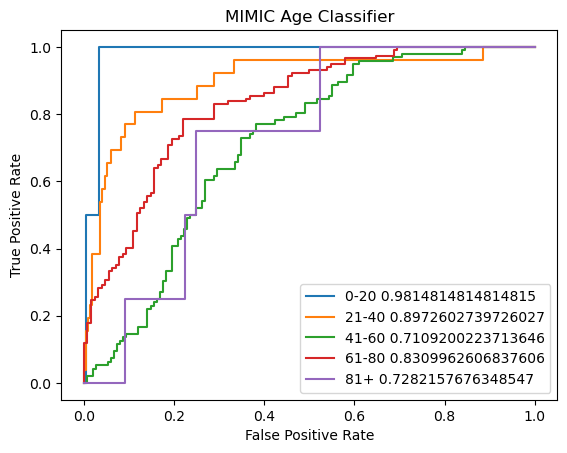

In [ ]:
base_jpg_path = r"D:\JSRT_Kaggle"
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\mimic_age.pkl") # replace
test_df['age'] = test_df['age'].replace('?', np.nan)
test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce').astype('Int64')
test_df['Patient Age Category'] = test_df['age'].apply(categorize_age)
test_path = r'D:\JSRT_Kaggle'# Replace this with the root path of your test images
# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='Patient Age Category',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=16
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Age_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Age_Probability'] =sex_preds[0].numpy().tolist()
predict_df['Patient Age Category'] = predict_df['age'].apply(categorize_age)
predict_df = predict_df.dropna(subset=['Patient Age Category'])
predict_df.to_csv('mimic_age_jsrt_test.csv', index=False)

predict_df = predict_df.dropna(subset=['Patient Age Category'])
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = 0)
plt.plot(fpr,tpr, label='0-20 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = 1)
plt.plot(fpr,tpr, label='21-40 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = 2)
plt.plot(fpr,tpr, label='41-60 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = 3)
plt.plot(fpr,tpr, label='61-80 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = 4)
plt.plot(fpr,tpr, label='81+ ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('MIMIC Age Classifier')
plt.legend(loc=4)
plt.show()

# NIH

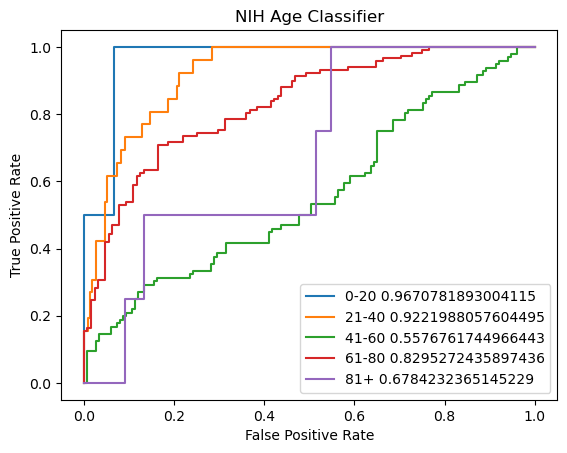

In [ ]:
base_jpg_path = r"D:\JSRT_Kaggle"
test_df = pd.read_csv(os.path.join(base_jpg_path, "jsrt_metadata.csv"))
pathlib.PosixPath = pathlib.WindowsPath
test_df['path']= r'images\images/' + test_df['study_id']
sex_model = load_learner(r"C:\Users\pree1\Downloads\nih_age.pkl") # replace
test_df['age'] = test_df['age'].replace('?', np.nan)
test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce').astype('Int64')
test_df['Patient Age Category'] = test_df['age'].apply(categorize_age)
test_path = r'D:\JSRT_Kaggle'# Replace this with the root path of your test images

# Create a DataLoader for the test set
dls_test = ImageDataLoaders.from_df(
    test_df,
    test_path,
    fn_col='path',
    label_col='Patient Age Category',  # or any other label column if available, otherwise you can use 'is_valid=False' to indicate no labels
    valid_pct=0.0,       # No validation split as this is the test set
    num_workers=4,
    device=torch.device('cuda'),
    item_tfms=Resize(224),
    bs=16
)
test_dl = dls_test.test_dl(test_df, with_labels=True)
sex_model.dls = dls_test

sex_model.dls = dls_test
sex_model.dls.to(device='cuda')
sex_model.model.to(device='cuda')
sex_test_dl = sex_model.dls.test_dl(test_df)
sex_preds = sex_model.get_preds(dl=sex_test_dl, with_decoded=True)


predict_df = test_df
predict_df['Age_Tensor_Id'] =sex_preds[2].numpy()
predict_df['Age_Probability'] =sex_preds[0].numpy().tolist()
predict_df['Patient Age Category'] = predict_df['age'].apply(categorize_age)
predict_df = predict_df.dropna(subset=['Patient Age Category'])
predict_df.to_csv('nih_age_jsrt_test.csv', index=False)

predict_df = predict_df.dropna(subset=['Patient Age Category'])
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[0] for prob in predict_df['Age_Probability']], pos_label = 0)
plt.plot(fpr,tpr, label='0-20 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[1] for prob in predict_df['Age_Probability']], pos_label = 1)
plt.plot(fpr,tpr, label='21-40 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[2] for prob in predict_df['Age_Probability']], pos_label = 2)
plt.plot(fpr,tpr, label='41-60 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[3] for prob in predict_df['Age_Probability']], pos_label = 3)
plt.plot(fpr,tpr, label='61-80 ' + str(metrics.auc(fpr, tpr)))
fpr, tpr, _ = metrics.roc_curve(y_true = predict_df['Patient Age Category'],y_score = [prob[4] for prob in predict_df['Age_Probability']], pos_label = 4)
plt.plot(fpr,tpr, label='81+ ' + str(metrics.auc(fpr, tpr)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('NIH Age Classifier')
plt.legend(loc=4)
plt.show()